In [208]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [209]:
import numpy as np
import pandas as pd

In [210]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [211]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%ls

Images/                Resources/             trip_avg_temp.png
README.md*             climate_starter.ipynb*


In [212]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [213]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [214]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [215]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [216]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [312]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

precipitation_analysis_1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()

precipitation_analysis_1 


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [313]:
# Calculate the date 1 year ago from the last data point in the database

Last_Year_Observation = dt.date(2017, 8, 23) - dt.timedelta(days=7*52)

Last_Year_Observation



datetime.date(2016, 8, 24)

In [314]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > Last_Year_Observation).all()

In [315]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results)

df.columns =  results[0].keys()

df.set_index('date',inplace = True)


In [316]:
# Sort the dataframe by date

pre_df = pd.DataFrame(precipitation_analysis_1)
pre_df['date'] = pd.to_datetime(pre_df['date'])
prec_df_sorted = pre_df.sort_values('date')
prec_df_sorted.head()

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


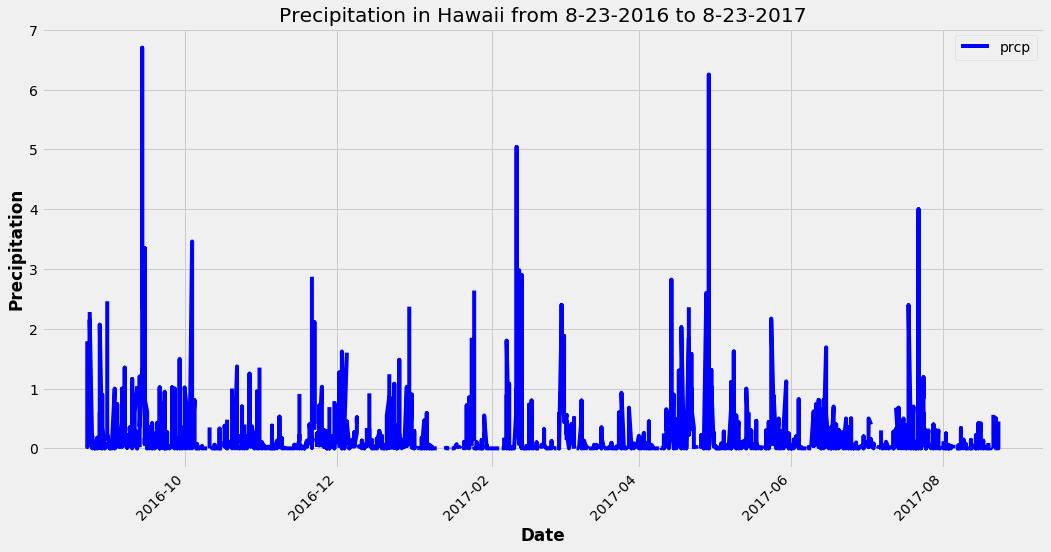

In [317]:
# Use Pandas Plotting with Matplotlib to plot the data
prec_df = pre_df.set_index('date')
prec_df.head()
prec_plot = prec_df.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Precipitation', weight='bold')
plt.xlabel('Date', weight='bold')
plt.title("Precipitation in Hawaii from 8-23-2016 to 8-23-2017")
plt.show()

![precipitation](Images/precipitation.png)

In [318]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe().round(2)

,Precipitation
count,2427.00
mean,1.05
std,2.29
min,0.00
25%,0.10
50%,0.40
75%,1.10
max,37.40


![describe](Images/describe.png)

In [319]:
# Design a query to show how many stations are available in this dataset?
station_df= pd.DataFrame(
    engine.execute("""
            SELECT COUNT(s.station)  
            FROM station s
                """).fetchall())

station_df.columns = ['total_stations']
station_df.head()


,total_stations
0,9


In [320]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_df= pd.DataFrame(
    engine.execute("""
            SELECT m.station, COUNT(m.station) AS Station_Activity 
            FROM measurement M
                GROUP BY 1
                ORDER BY 2 desc
                """).fetchall())

station_df.columns = ['Station_ID', 'Station_Activity']
station_df


,Station_ID,Station_Activity
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [321]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

active_df= pd.DataFrame(
    engine.execute("""
            SELECT m.station, min(m.tobs), max(m.tobs), avg(m.tobs)  
            FROM measurement m
            WHERE STATION =  'USC00519281'
                GROUP BY 1
                """).fetchall())
active_df.columns = ['Station_ID', 'Min', 'Max', 'Avg']
active_df


,Station_ID,Min,Max,Avg
0,USC00519281,54.0,85.0,71.663781


In [322]:
# Choose the station with the highest number of temperature observations.

most_active_station = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

most_active_station



[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

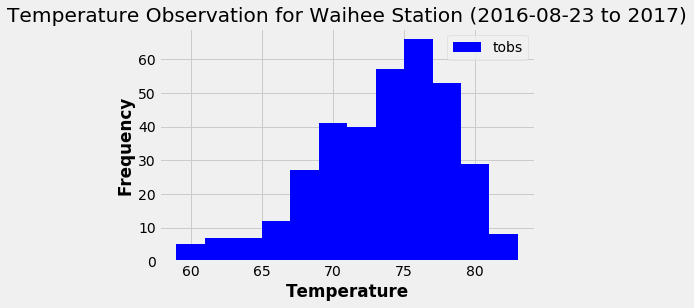

In [323]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
waihee_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").\
all()

temperatures = [temp[0] for temp in waihee_tobs]

plt.hist(temperatures, bins=12, color='b')
plt.title("Temperature Observation for Waihee Station (2016-08-23 to 2017)")
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']
plt.legend(labels)

![precipitation](Images/station-histogram.png)

In [324]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):

    temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                          filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [325]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_start = dt.date(2017, 7, 1)
trip_end = dt.date(2017, 7, 15)
last_year = dt.timedelta(days=365)
temp_avg_year_1 = (calc_temps((trip_start-last_year), (trip_end-last_year)))
print(temp_avg_year_1)

[(71.0, 77.06382978723404, 82.0)]


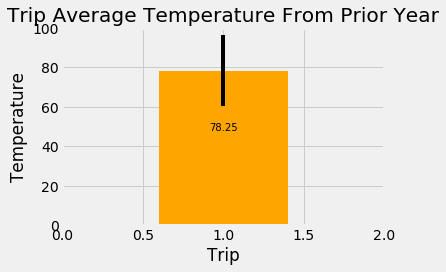

In [326]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


# plot the calculated min/max/avg from last year for the trip dates as a bar chart

p2p = temp_avg_lst_year[0][2]-temp_avg_lst_year[0][0]
avgtemp = temp_avg_lst_year[0][1]
min_temp = temp_avg_lst_year[0][0]
max_temp = temp_avg_lst_year[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avgtemp, color= 'orange', yerr=p2p)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
ax.set_title("Trip Average Temperature From Prior Year")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

        
    # label the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()



In [327]:
start_date=dt.date(2017, 7 ,1)
end_date=dt.date(2017, 7 ,15)
type(start_date)

datetime.date

In [328]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.

precipitation_analysis_1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2017-07-01").\
    filter(Measurement.date <= "2017-07-15").all()

precipitation_analysis_1


[('2017-07-01', 0.02),
 ('2017-07-02', 0.02),
 ('2017-07-03', 0.04),
 ('2017-07-04', 0.04),
 ('2017-07-05', 0.0),
 ('2017-07-06', 0.0),
 ('2017-07-07', 0.0),
 ('2017-07-08', 0.0),
 ('2017-07-09', 0.0),
 ('2017-07-10', 0.0),
 ('2017-07-11', 0.0),
 ('2017-07-12', 0.0),
 ('2017-07-13', 0.07),
 ('2017-07-14', 0.02),
 ('2017-07-15', 0.0),
 ('2017-07-01', 0.06),
 ('2017-07-02', 0.05),
 ('2017-07-03', 0.13),
 ('2017-07-04', 0.03),
 ('2017-07-05', 0.0),
 ('2017-07-06', 0.0),
 ('2017-07-07', 0.02),
 ('2017-07-08', 0.02),
 ('2017-07-09', 0.09),
 ('2017-07-10', 0.0),
 ('2017-07-11', 0.01),
 ('2017-07-12', 0.01),
 ('2017-07-13', 0.33),
 ('2017-07-14', 0.05),
 ('2017-07-15', 0.03),
 ('2017-07-03', None),
 ('2017-07-05', None),
 ('2017-07-07', None),
 ('2017-07-08', 0.06),
 ('2017-07-09', 0.0),
 ('2017-07-10', 0.0),
 ('2017-07-11', 0.0),
 ('2017-07-12', 0.02),
 ('2017-07-13', 0.3),
 ('2017-07-14', 0.0),
 ('2017-07-15', 0.01),
 ('2017-07-03', None),
 ('2017-07-05', None),
 ('2017-07-06', None),
 ('20

In [329]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

q = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= start_date)\
.filter(Measurement.date <= end_date)\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())


In [330]:
print()
print (f"Historical Rainfall Per Weather Station - Descending order\n  Trip Dates: \
{start_date} - {end_date}\n  Most Recent Data Search Dates: {start_date} - {end_date}")
print()
for row in q:
    rain="{0:.2f}".format(row[1])
    print (f"Station:  {row[0]}\n    Rainfall:  {rain}  \n    Location:  {row[2]}\n    Elevation:  {row[3]}  \
    Latitude:  {row[4]}  Longitude:  {row[5]}")
    print()       


Historical Rainfall Per Weather Station - Descending order
  Trip Dates: 2017-07-01 - 2017-07-15
  Most Recent Data Search Dates: 2017-07-01 - 2017-07-15

Station:  USC00516128
    Rainfall:  2.87  
    Location:  MANOA LYON ARBO 785.2, HI US
    Elevation:  152.4      Latitude:  21.3331  Longitude:  -157.8025

Station:  USC00519281
    Rainfall:  1.64  
    Location:  WAIHEE 837.5, HI US
    Elevation:  32.9      Latitude:  21.45167  Longitude:  -157.84888999999998

Station:  USC00513117
    Rainfall:  0.83  
    Location:  KANEOHE 838.1, HI US
    Elevation:  14.6      Latitude:  21.4234  Longitude:  -157.8015

Station:  USC00514830
    Rainfall:  0.39  
    Location:  KUALOA RANCH HEADQUARTERS 886.9, HI US
    Elevation:  7.0      Latitude:  21.5213  Longitude:  -157.8374

Station:  USC00519397
    Rainfall:  0.21  
    Location:  WAIKIKI 717.2, HI US
    Elevation:  3.0      Latitude:  21.2716  Longitude:  -157.8168

Station:  USC00519523
    Rainfall:  0.13  
    Location:  WAIMA

TypeError: unsupported format string passed to NoneType.__format__

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [331]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [332]:
# Plot the daily normals as an area plot with `stacked=False`

